This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [28]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [29]:
test_data0 = test_data.copy()

In [30]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [6]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [10]:
import numpy as np
from tensorflow import keras
from keras import layers, models

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [11]:
all_scores

[1.9560049772262573, 2.289191722869873, 2.42167067527771, 2.294888496398926]

In [12]:
np.mean(all_scores)

2.2404389679431915

**Saving the validation logs at each fold**

In [13]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [14]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [17]:
np.mean(average_mae_history)

2.530993905544281

**Plotting validation scores**

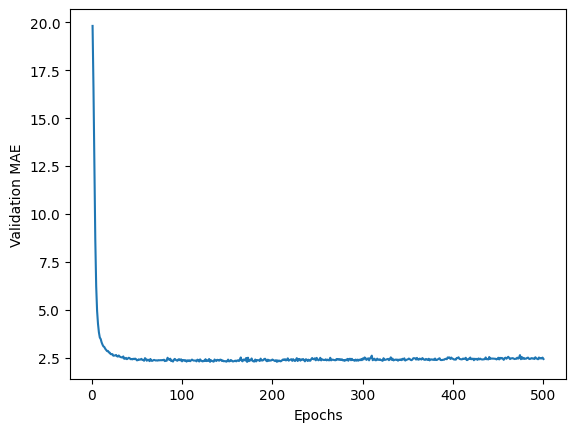

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

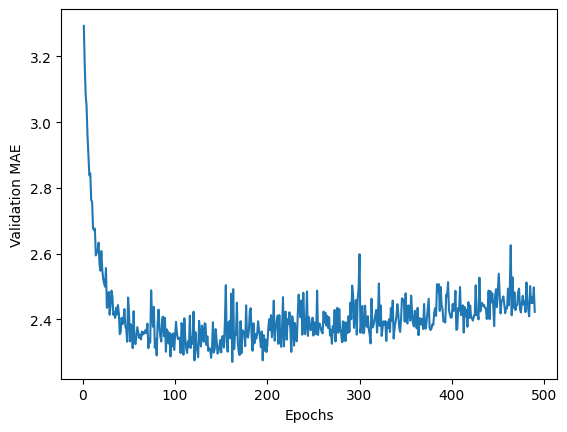

In [20]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [21]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 218us/step - loss: 14.5844 - mae: 2.5200


In [22]:
test_mae_score

2.519998073577881

### Generating predictions on new data

In [23]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 6ms/step


array([8.591643], dtype=float32)

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [33]:
features = ['CRIM - per capita crime rate by town',
            'ZN - proportion of residential land zoned for lots over 25,000 sq.ft.',
            'INDUS - proportion of non-retail business acres per town.',
            'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
            'NOX - nitric oxides concentration (parts per 10 million)',
            'RM - average number of rooms per dwelling',
            'AGE - proportion of owner-occupied units built prior to 1940',
            'DIS - weighted distances to five Boston employment centres',
            'RAD - index of accessibility to radial highways',
            'TAX - full-value property-tax rate per $10,000',
            'PTRATIO - pupil-teacher ratio by town',
            'B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
            'LSTAT - % lower status of the population',
            "MEDV - Median value of owner-occupied homes in $1000's"
            ]

In [46]:
for idx, featureValue in enumerate(test_data0[0]):
    print(featureValue, features[idx])
    #print(f"{featureValue:>10}  {features[idx]}")


18.0846 CRIM - per capita crime rate by town
0.0 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
18.1 INDUS - proportion of non-retail business acres per town.
0.0 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
0.679 NOX - nitric oxides concentration (parts per 10 million)
6.434 RM - average number of rooms per dwelling
100.0 AGE - proportion of owner-occupied units built prior to 1940
1.8347 DIS - weighted distances to five Boston employment centres
24.0 RAD - index of accessibility to radial highways
666.0 TAX - full-value property-tax rate per $10,000
20.2 PTRATIO - pupil-teacher ratio by town
27.25 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
29.05 LSTAT - % lower status of the population


### Wrapping up

## Summary